In [65]:
import numpy as np
import matplotlib.pyplot as plt

In [66]:
def load_data(data_dir, fiber_type, mod_type, index_type, curvatures):
    data = {}
    for i, c in enumerate(curvatures):
        _loaded_data = np.load(
            f'{data_dir}/cohdata_dist_011022_{fiber_type}_{mod_type}_{c}.npz',
            allow_pickle=True)
        data[c] = _loaded_data[index_type].tolist()
    return data


def plot_entity_by_distance(data_by_curv, entity_key, distances=[0], expands=[1], index=0):
    fig, axes = plt.subplots(1, len(data_by_curv), figsize=(12, 3), dpi=200)
    for i, (c, ld) in enumerate(data_by_curv.items()):
        area_size = ld['params']['area_size']
        core_radius = ld['params']['core_radius']
        bounds = [-area_size / 2 * expands[index], area_size / 2 * expands[index]]
        entities = [v for k, v in ld.items() if k.startswith(entity_key)]
        rstr = f'R = {np.inf if not c else c} cm'
        lstr = f', L = {distances[index]} um' if len(entities) > 1 else ''
        axes[i].imshow(entities[index], extent=bounds * 2)
        axes[i].set_title(rstr + lstr)
    plt.show()

In [67]:
index_type = 'GRIN'
mod_type = 'slm'
fiber_type = 'mmf'
data_dir = 'mmf'
wl = 0.632
curvatures = [0, 20, 15, 10]
distances = np.array([0, 20, 40, 60, 80, 100, 150,
                     200, 400, 1000, 3000, 10000])
expands = [1] * 6 + [2] * 1 + [1] * 2 + [2] * 3 + [1]
expands = [np.prod(expands[:i]) for i in range(1, len(expands))]

In [68]:
data_by_curv = load_data(
    data_dir, fiber_type, mod_type, index_type, curvatures
)

Зависимость корреляционной функции, построенной по 1000 измерениям, от расстояния от плоскости измерения до среза волокна (в мкм) и радиуса кривизны волокна (в см).

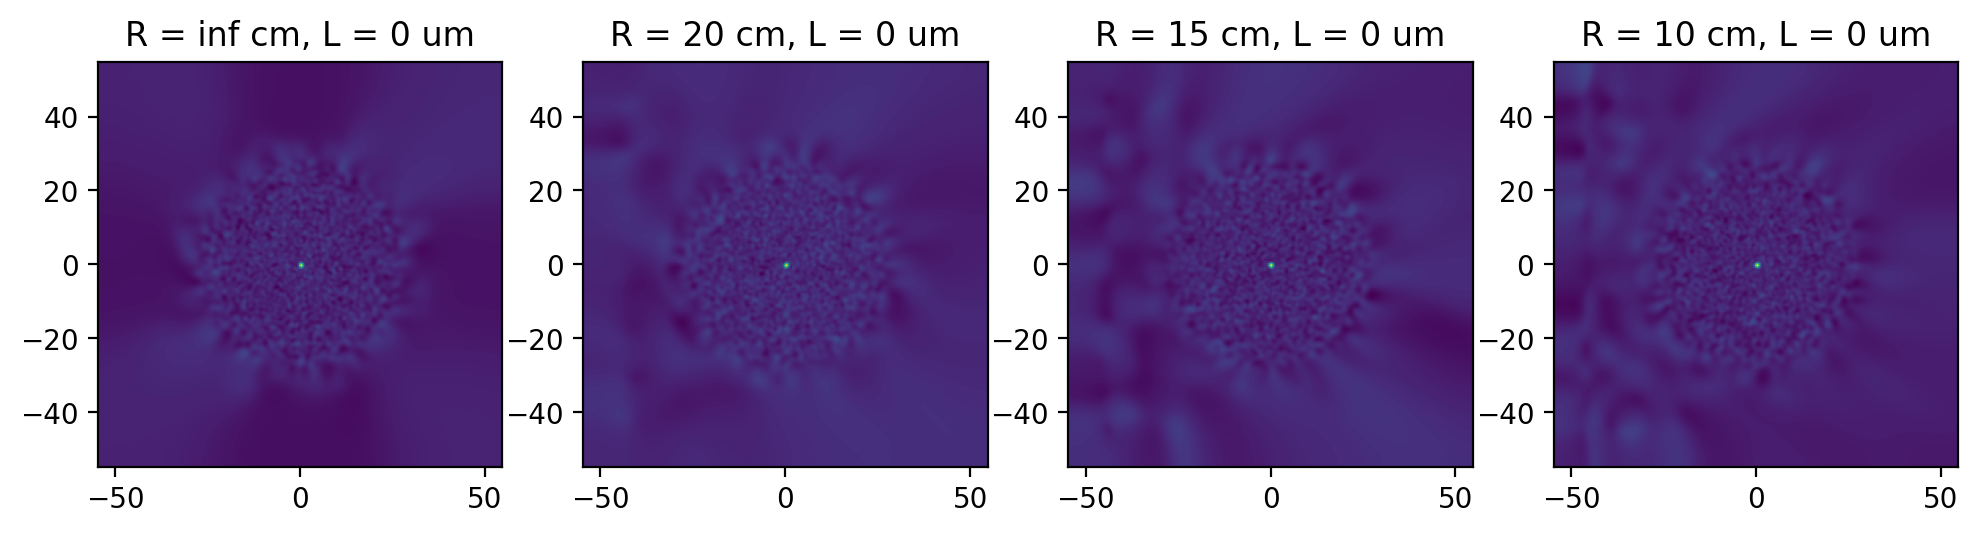

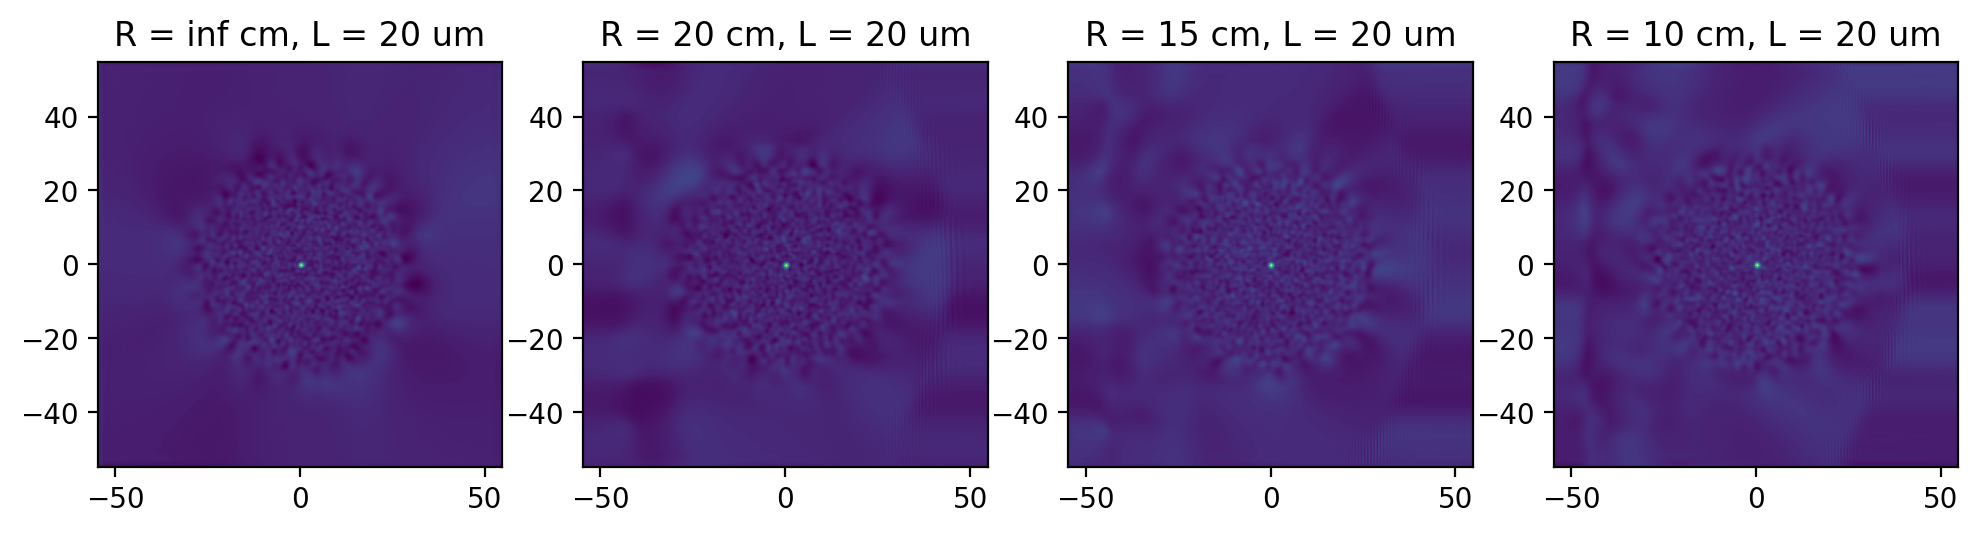

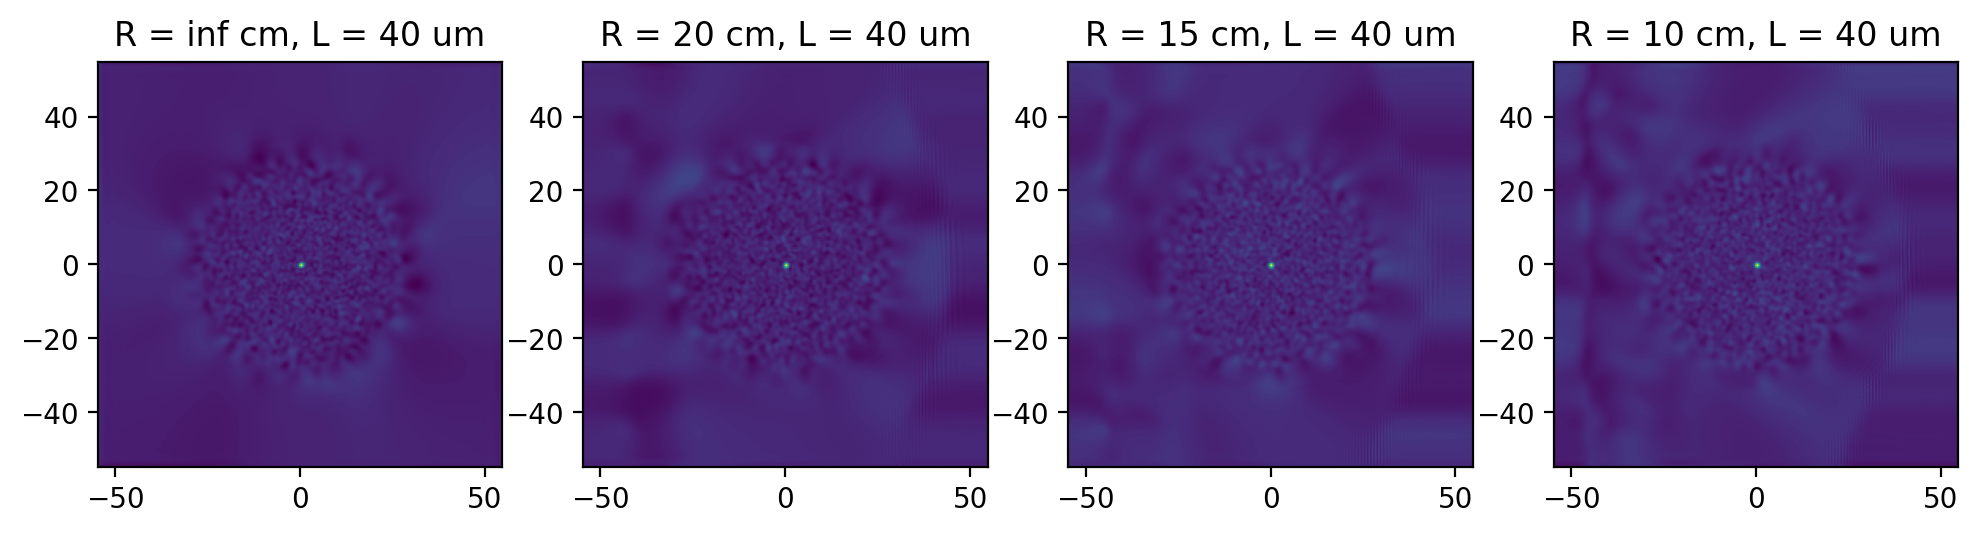

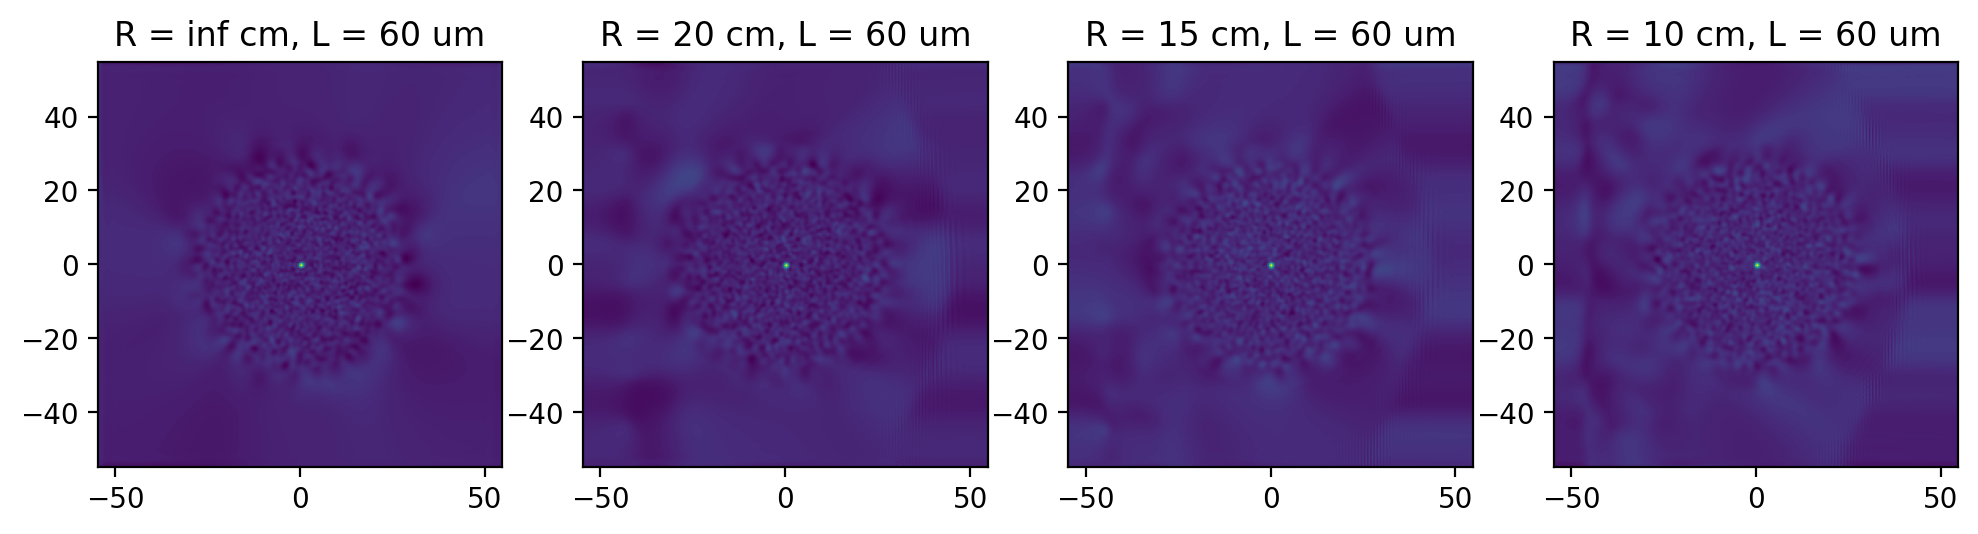

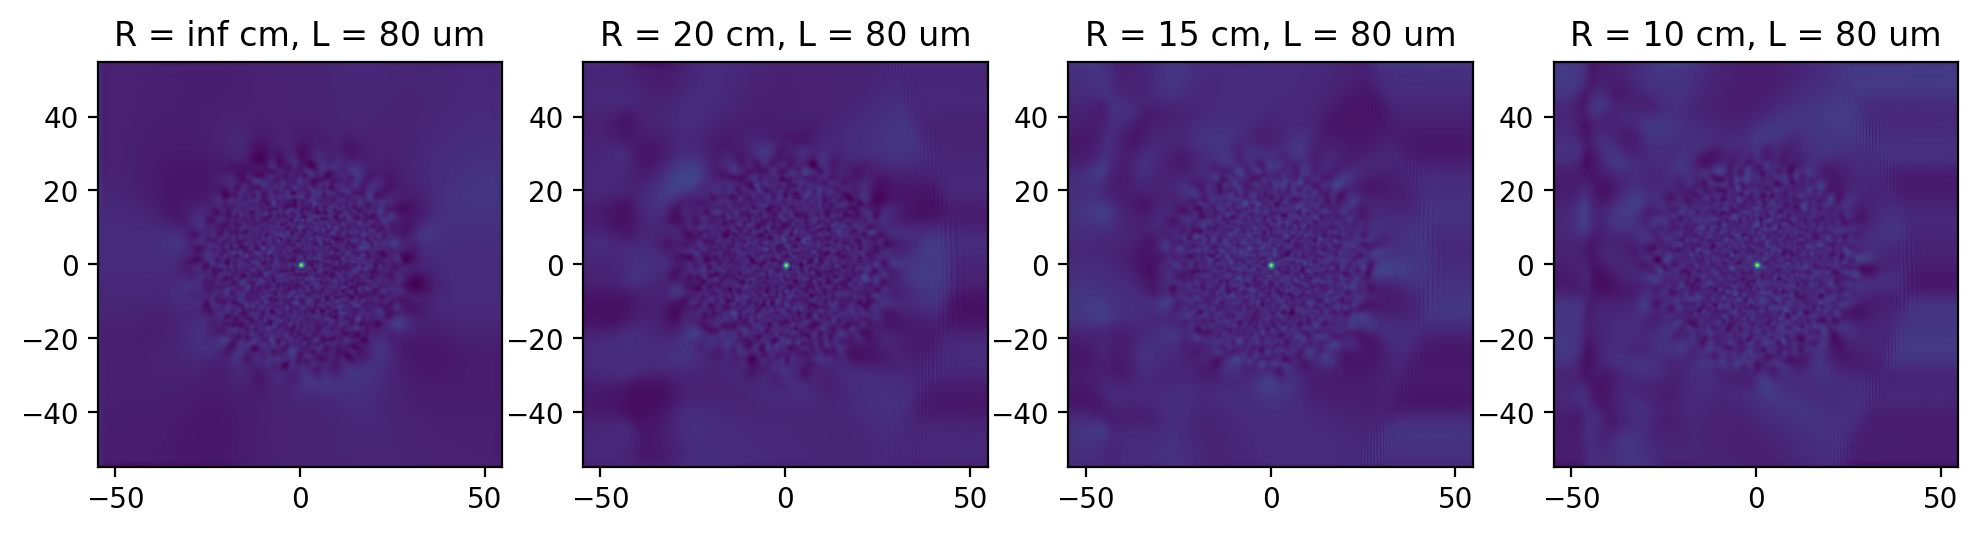

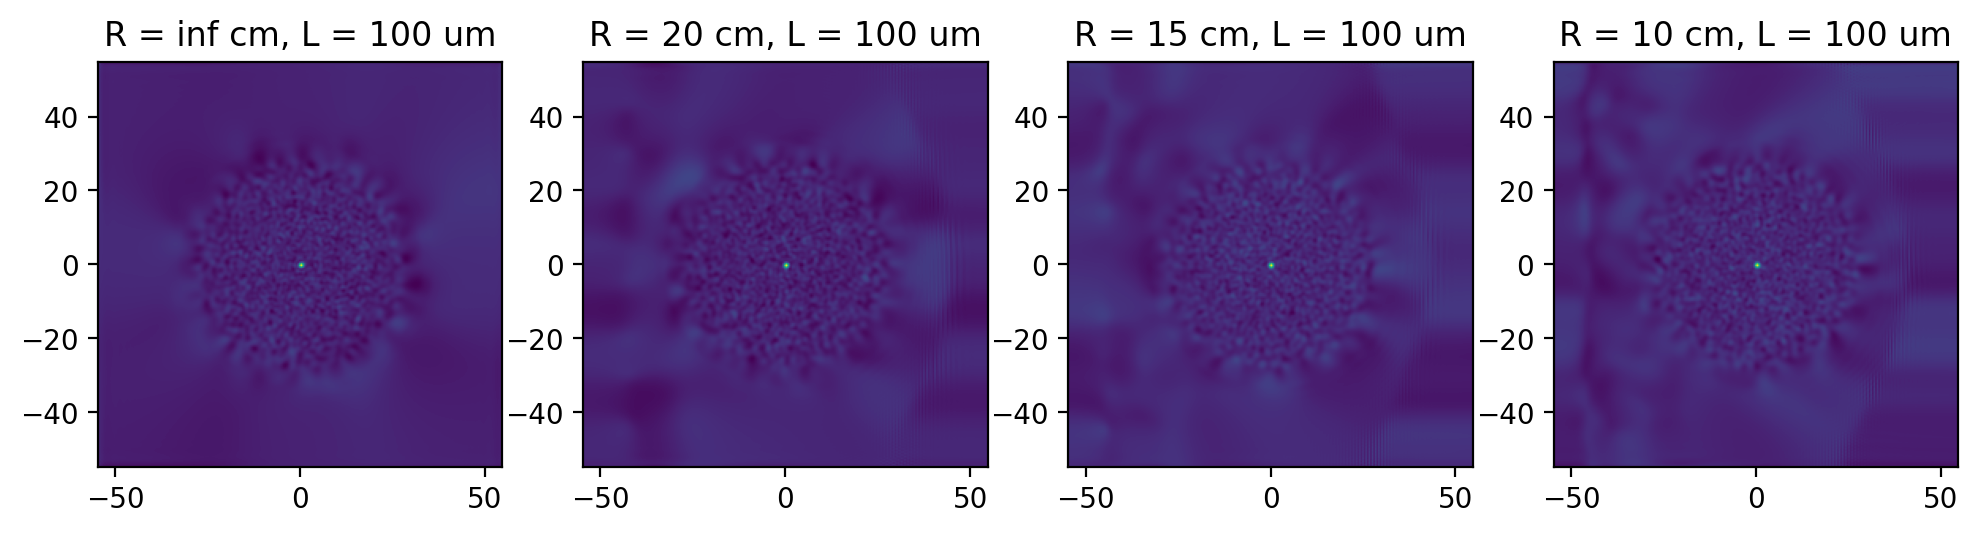

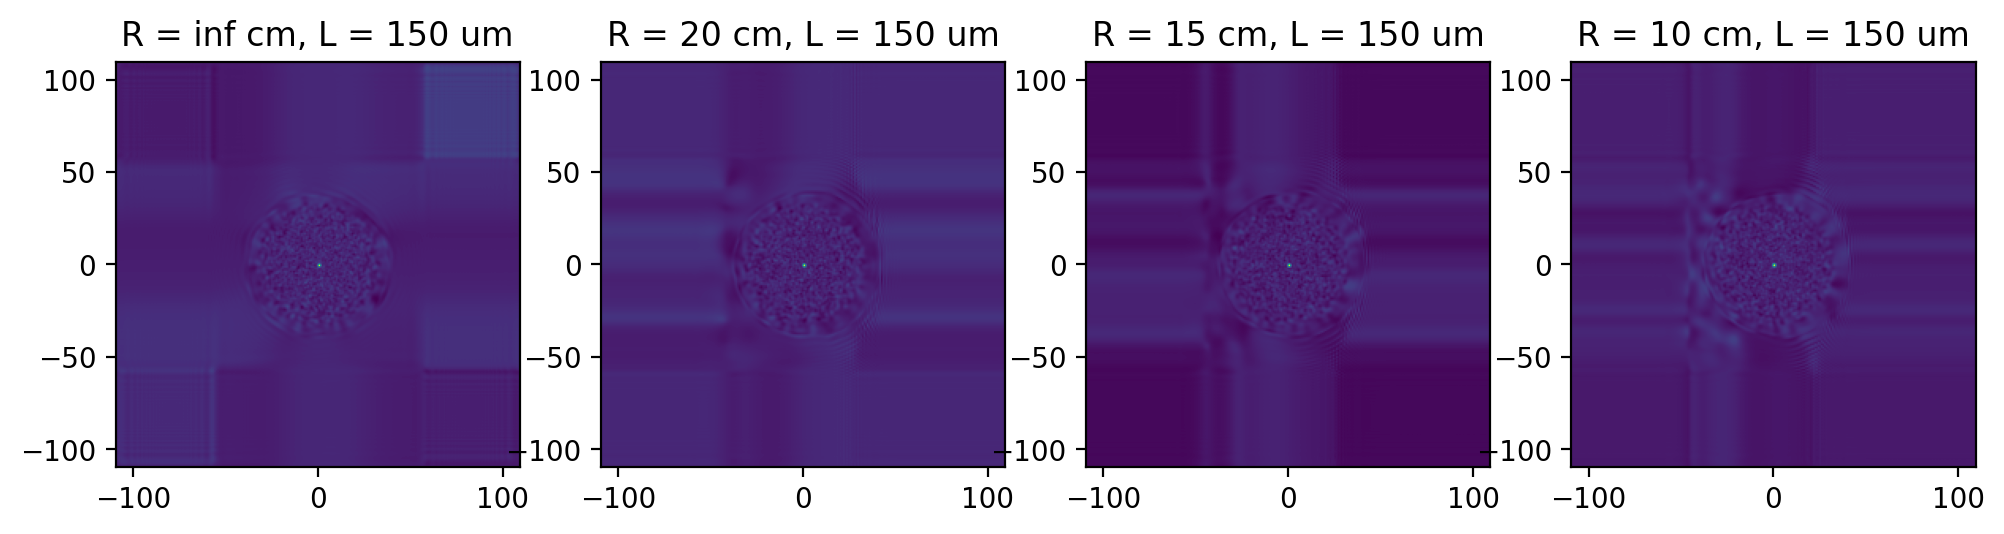

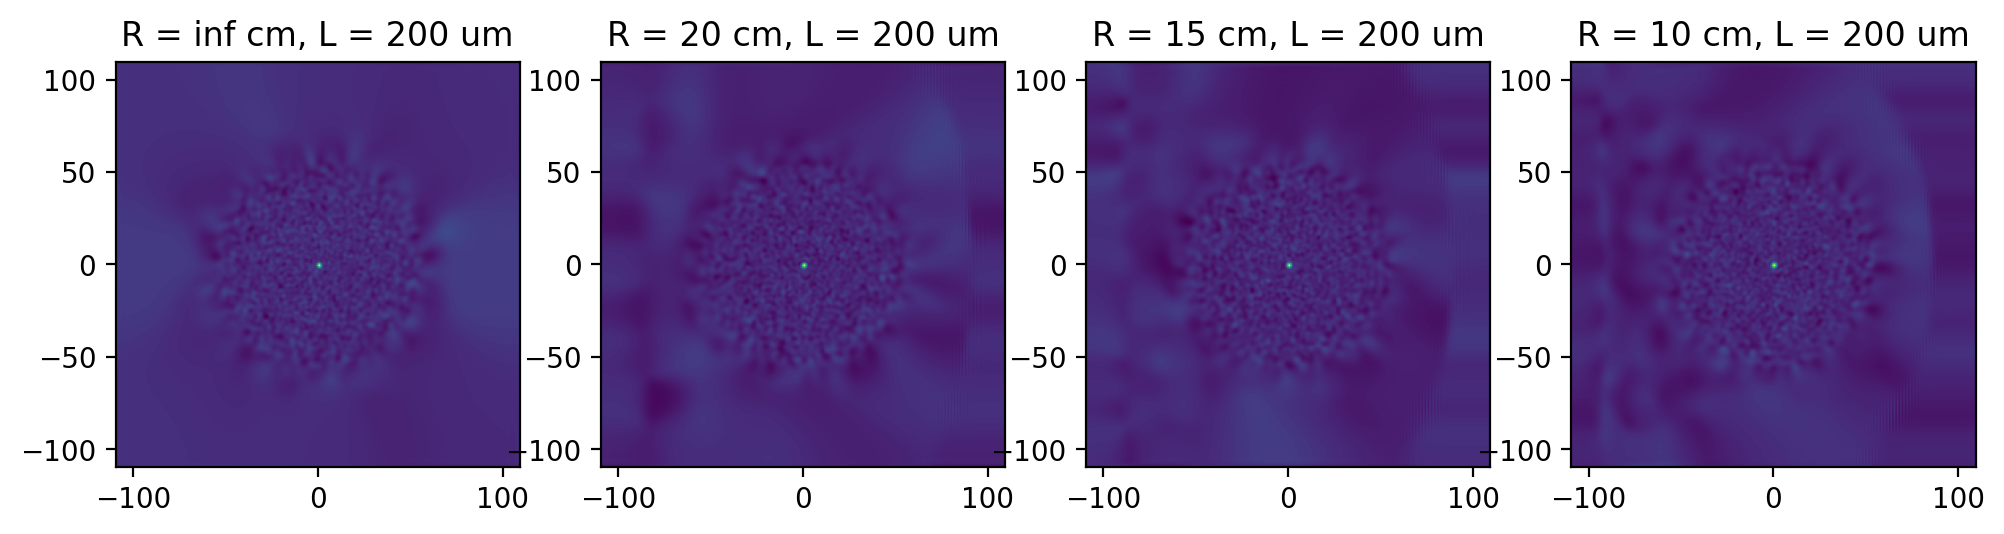

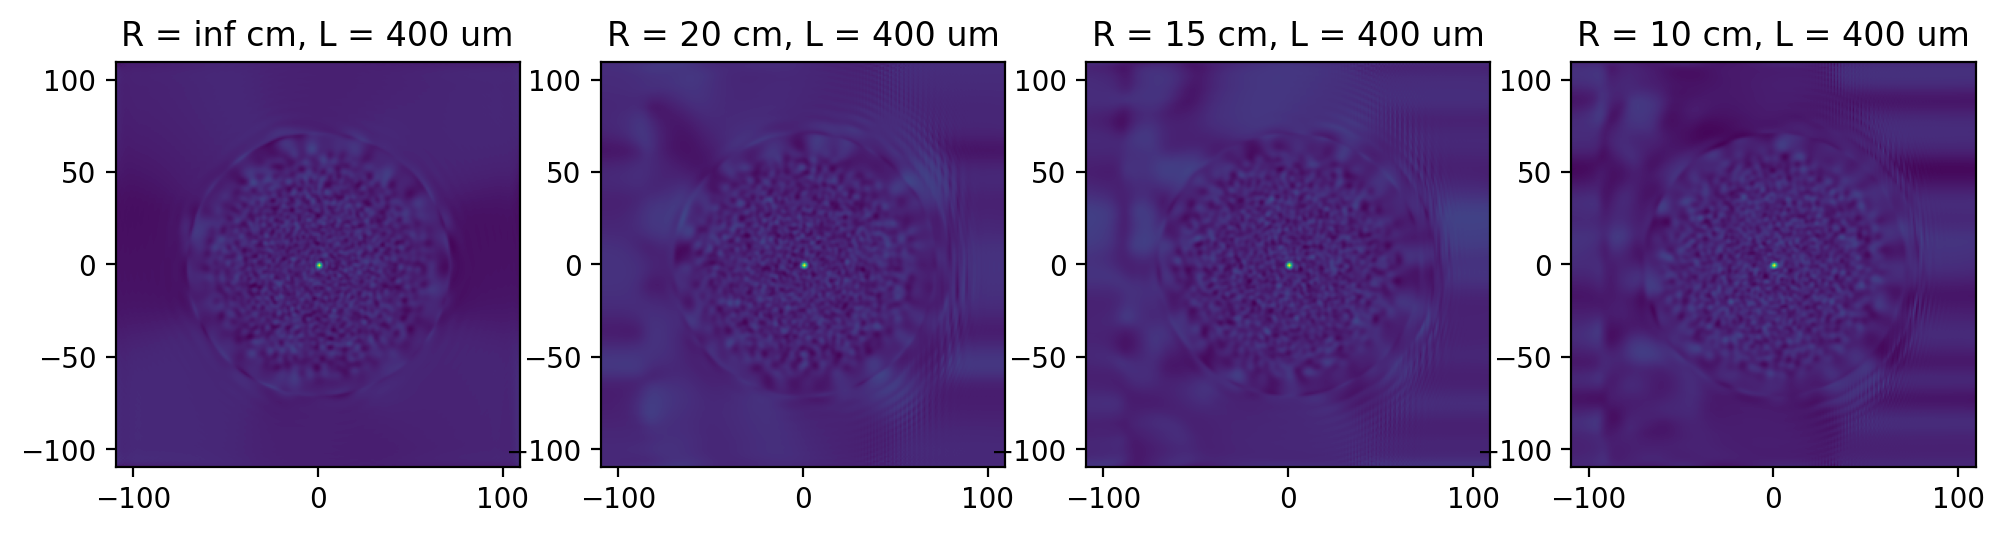

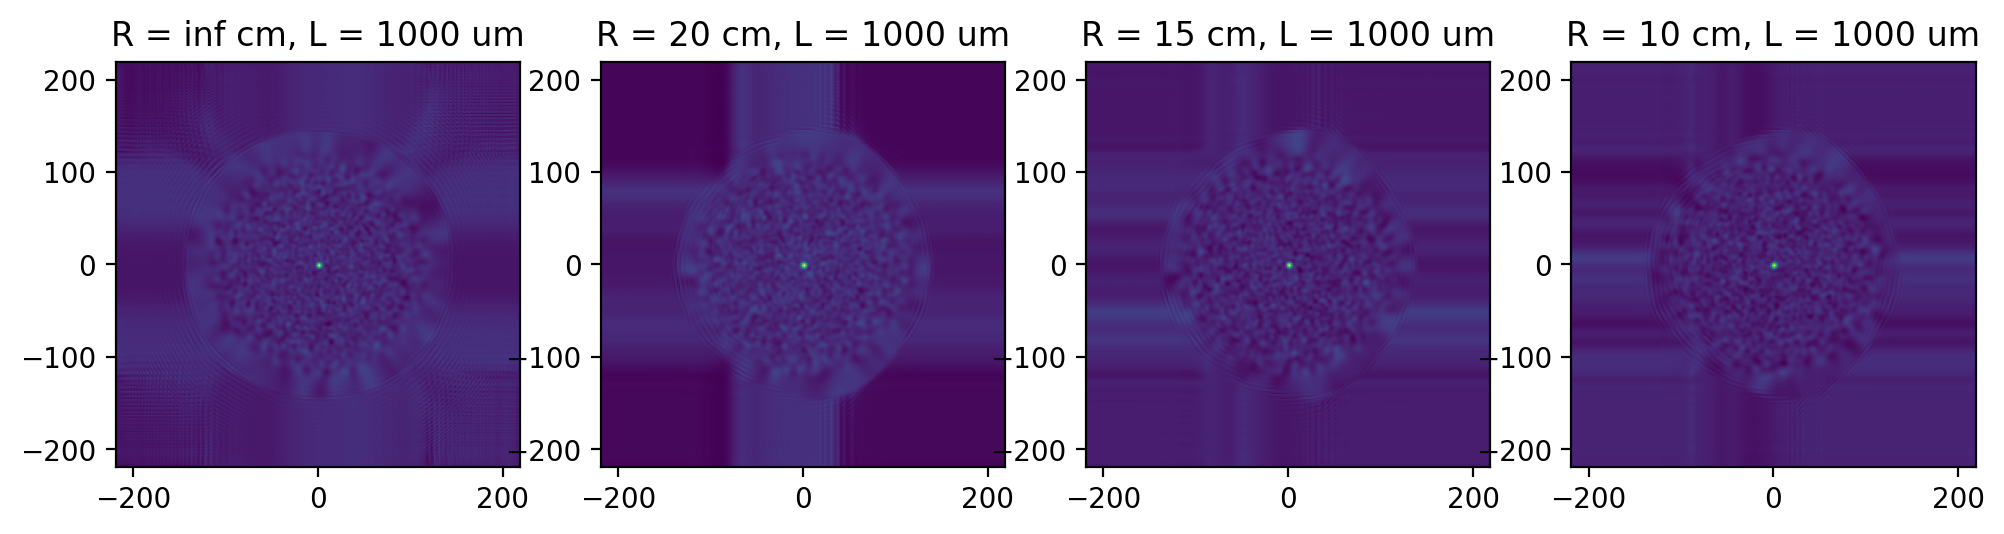

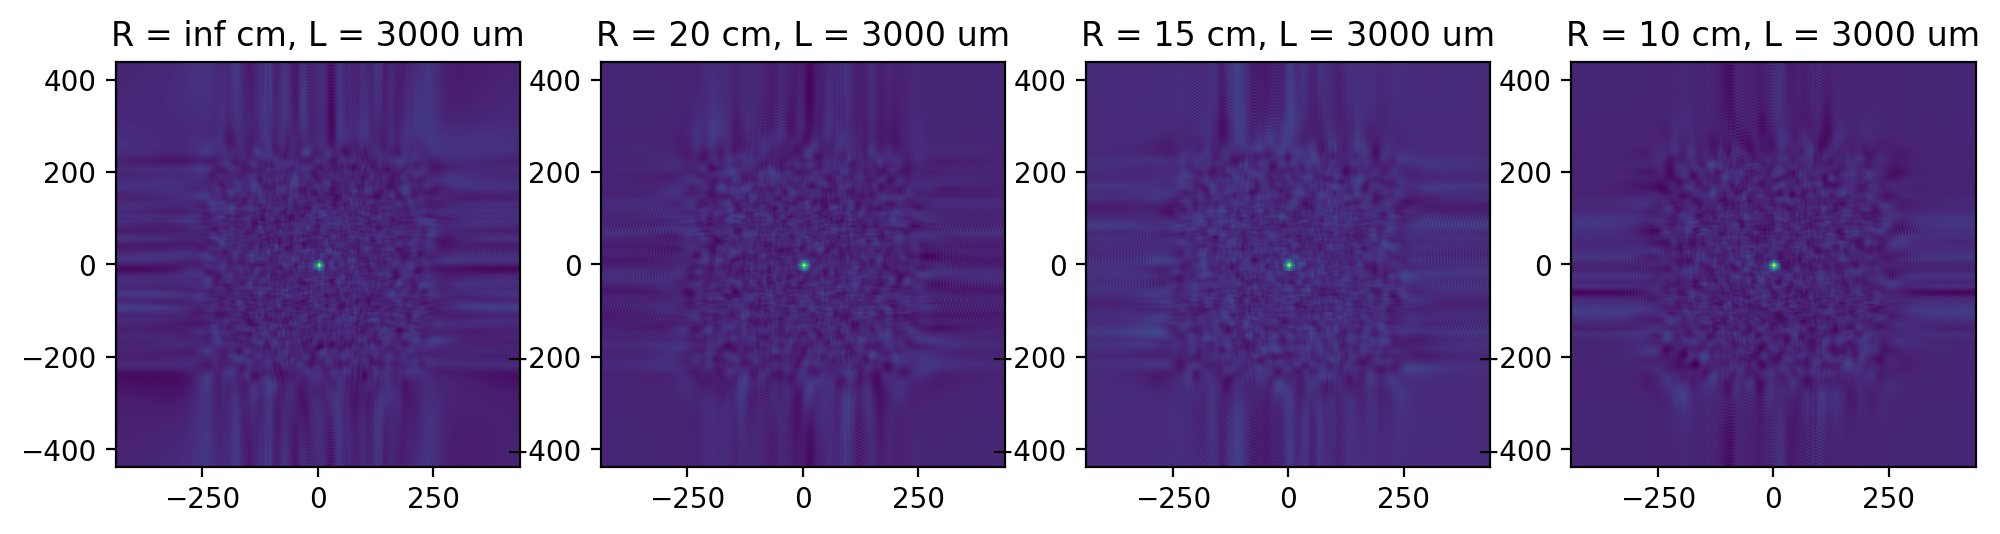

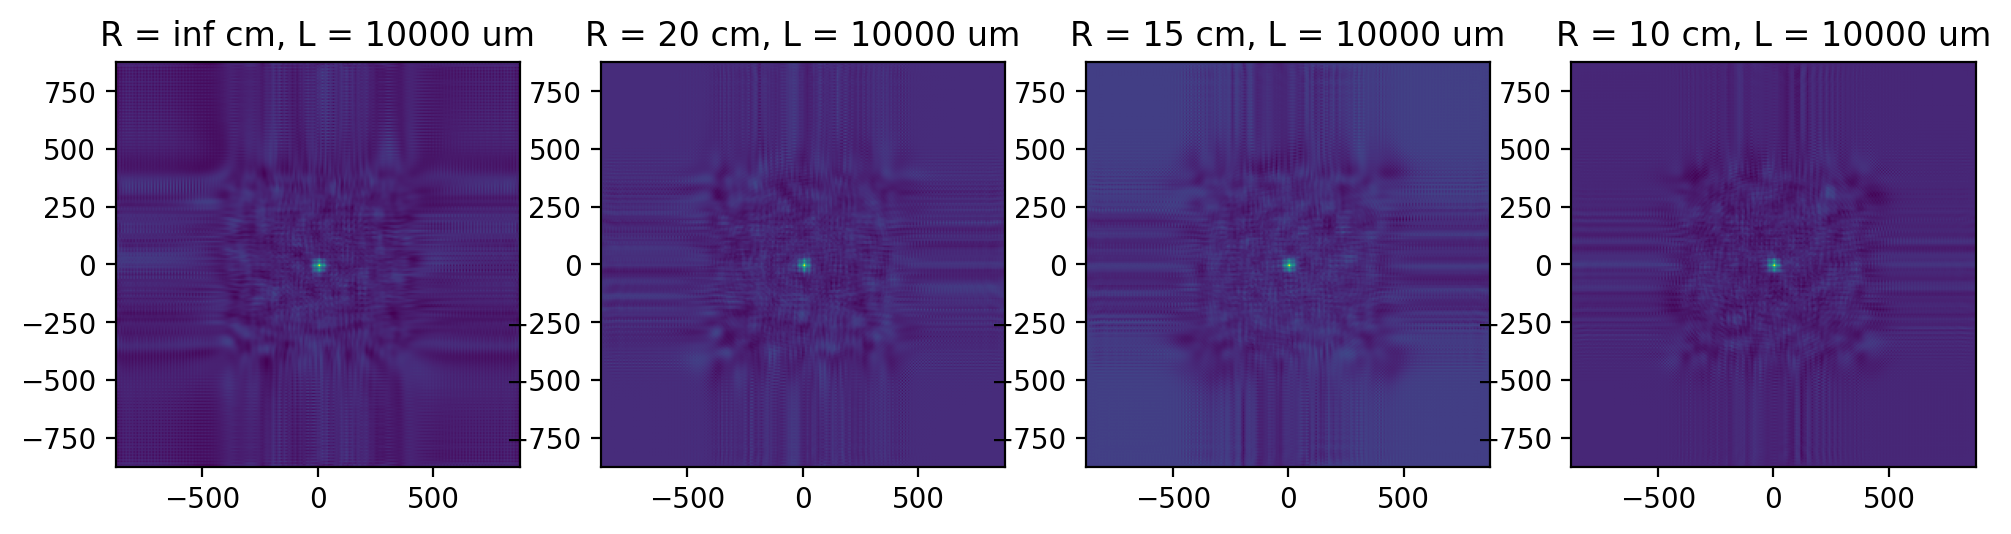

In [69]:
for i in range(len(distances)):
    plot_entity_by_distance(data_by_curv, 'o__cf', distances, expands, i)

Зависимость структуры профиля интенсивности входного случайно модулированного поля при разложении его по модам волокна в зависимости от радиуса кривизны волокна

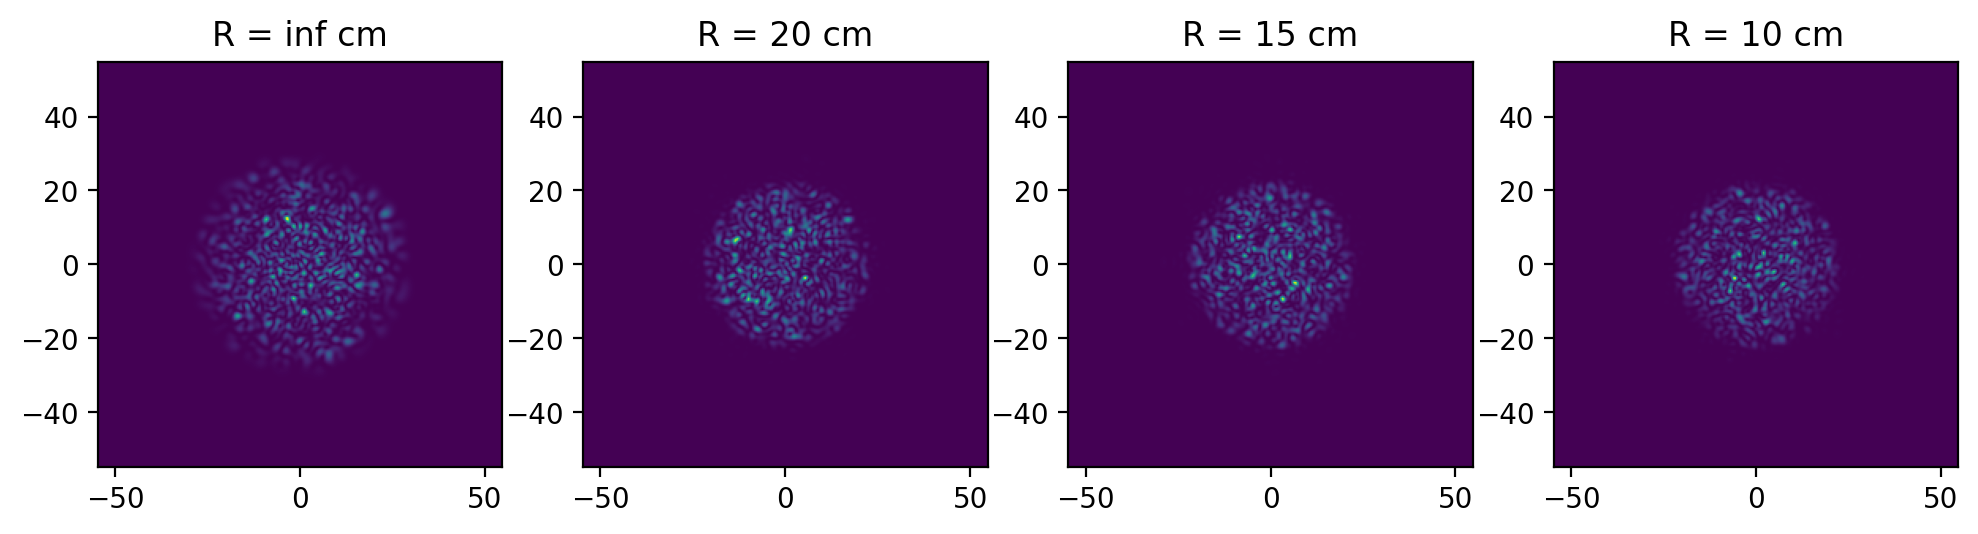

In [70]:
plot_entity_by_distance(data_by_curv, 'i__ip')

Зависимость структуры профиля интенсивности случайно модулированного поля на выходе из волокна длиной 10 см в зависимости от радиуса кривизны волокна

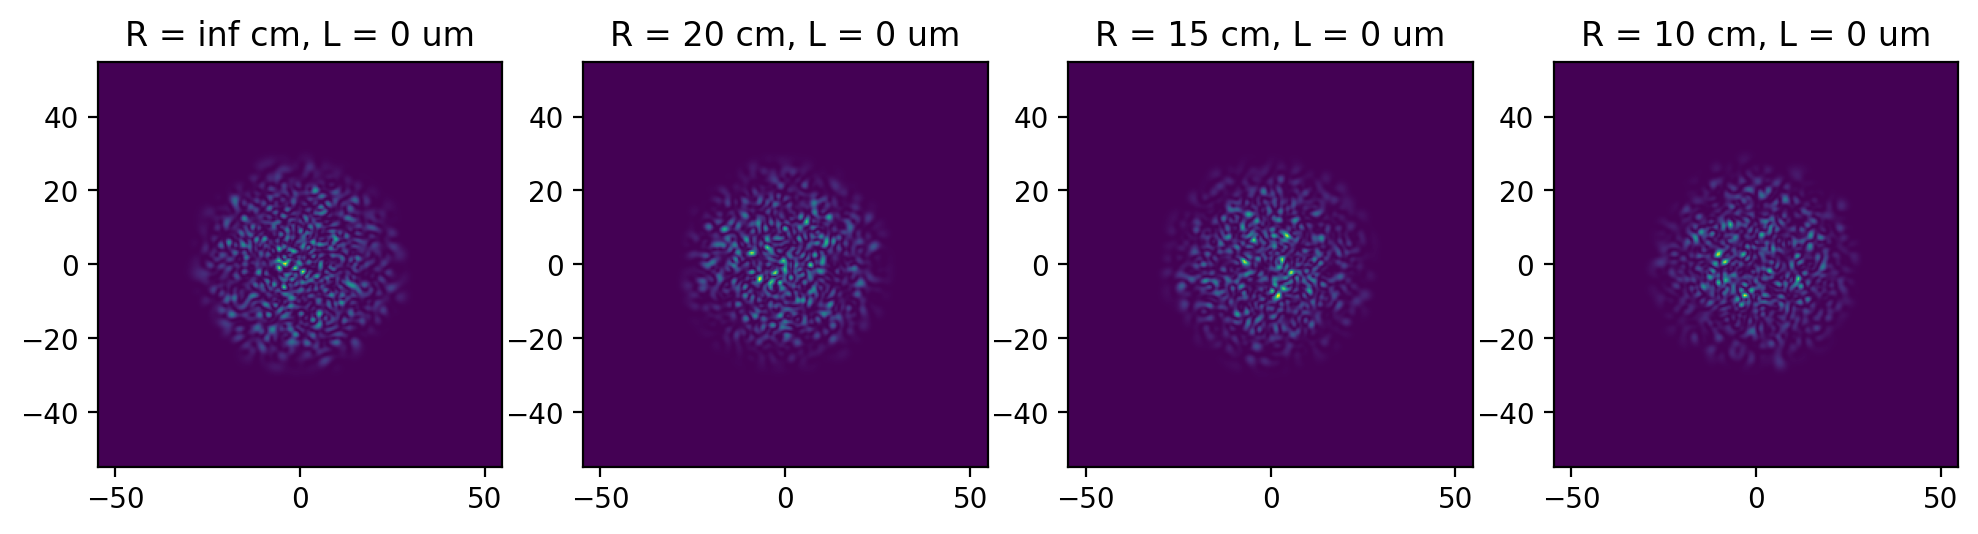

In [71]:
plot_entity_by_distance(data_by_curv, 'o__ip')